In [54]:
# Imported the necessary libraries
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Import the pandas library to read our dataset 
import pandas as pd
# Get the train/test split package from sklearn for preparing our dataset to # train and test the model with 
from sklearn.model_selection import train_test_split
# Import the numpy library to work with and manipulate the data 
# Get the train/test split package from sklearn for preparing our dataset to
# train and test the model with
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import csv
import urllib.request as urllib2
from nltk import FreqDist
import nltk 
import random 
from nltk.tokenize import word_tokenize
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical
import time

nltk.download('punkt') 
nltk.download('stopwords') 
#nltk.download('movie_reviews') 
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
# Importing data using url
url = 'https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv'
response = urllib2.urlopen(url)

# reading data using pandas and converting into dataframe
df = pd.read_csv(response,delimiter='\t',encoding='utf-8')
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [56]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()# printing first 5 rows on dataset

,PhraseId,SentenceId,Phrase,Sentiment
0,13988,602,an almost feature-length film,2
1,30234,1404,"has a caffeinated , sloppy brilliance , sparkl...",2
2,15796,677,sure hand,3
3,103594,5464,The sight of the name Bruce Willis,2
4,76365,3922,Sheridan 's,2


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(df ['Phrase'], df ['Sentiment'], test_size=0.3, random_state=2003)#spliting dataset
documents=[]
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())


for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 

X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())
for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) 

documents[0]

[['Really',
  'is',
  'a',
  'pan-American',
  'movie',
  ',',
  'with',
  'moments',
  'of',
  'genuine',
  'insight',
  'into',
  'the',
  'urban',
  'heart',
  '.'],
 3]

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
#parameters to adjust to see the impact on outcome 
remove_stopwords = True
useStemming = False
useLemma = False
removePuncs = True


In [59]:
for l in range(len(documents)):                   #For each review document 
  label = documents[l][1]                         #Save review label 
  tmpReview = []                                  #Placeholder list for new review 
  for w in documents[l][0]:                       #For each word this is review 
    newWord = w                                   #Set newWork to be the updated word 
    if remove_stopwords and (w in stopwords_en):  #if the word is a stopword & we want to remove stopwords 
      continue                                    #skip the word and don’t had it to the normalized review 
    if removePuncs and (w in punctuations):       #if the word is a punc. & we want to remove punctuations 
      continue                                    #skip the word and don’t had it to the normalized review 
    if useStemming:
      #if useStemming is set to True 
      #Keep one stemmer commented out 
      #newWord = porter.stem(newWord) #User porter stemmer 
      newWord = lancaster.stem(newWord) #Use Lancaster stemmer 
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord)                     #Add normalized word to the tmp review 
  documents[l] = (tmpReview, label)             #Update the reviews list with clean review 
  documents[l] = (' '.join(tmpReview), label) 

print(documents[0])

('Really pan-American movie moments genuine insight urban heart', 3)


In [60]:
df = pd.DataFrame(documents, columns=['text', 'sentiment']) 
df.head()



,text,sentiment
0,Really pan-American movie moments genuine insi...,3
1,way,2
2,strands,2
3,compelling storyline,4
4,pointless meandering,0


In [0]:
#X_train, X_test, Y_train, Y_test = train_test_split(df['text'],  df['sentiment'], test_size=0.3, random_state=2003)

In [0]:

vectorizer = TfidfVectorizer(max_features = 2500)#,ngram_range=(2, 2)) 
X = vectorizer.fit_transform(df["text"]) 
Y = df['sentiment'] 
 
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test


In [63]:
Y_test

array([2, 3, 3, ..., 4, 2, 2])

In [0]:
#function for Recall
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
#function for Precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
#function for F1 Score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [0]:
batch_size = 128
num_classes = 5
epochs = 15

In [66]:
X_train.shape


(109242, 2500)

In [0]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [68]:
Y_test

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(2500,1)))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(Conv1D(128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, #compiling model
              optimizer=keras.optimizers.Adamax(), 
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [72]:

history= model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 109242 samples, validate on 46818 samples
Epoch 1/20
109242/109242 [==============================] - 56s 517us/step - loss: 1.0669 - acc: 0.5803 - f1_m: 0.5212 - precision_m: 0.6496 - recall_m: 0.4395 - val_loss: 0.9991 - val_acc: 0.6053 - val_f1_m: 0.5598 - val_precision_m: 0.6783 - val_recall_m: 0.4772
Epoch 2/20
109242/109242 [==============================] - 56s 513us/step - loss: 0.9572 - acc: 0.6218 - f1_m: 0.5885 - precision_m: 0.6837 - recall_m: 0.5173 - val_loss: 0.9867 - val_acc: 0.6098 - val_f1_m: 0.5753 - val_precision_m: 0.6721 - val_recall_m: 0.5035
Epoch 3/20
109242/109242 [==============================] - 56s 513us/step - loss: 0.9352 - acc: 0.6289 - f1_m: 0.5998 - precision_m: 0.6879 - recall_m: 0.5324 - val_loss: 0.9878 - val_acc: 0.6101 - val_f1_m: 0.5802 - val_precision_m: 0.6613 - val_recall_m: 0.5173
Epoch 4/20
109242/109242 [==============================] - 56s 514us/step - loss: 0.9186 - acc: 0.6338 - f1_m: 0.6060 - precision_m: 0.6900 - recall_m: 0

In [0]:

model.save('1100901_1dconv_reg.h5')#saving my model.

In [0]:
from keras.models import load_model #loading my model
model = load_model('1100901_1dconv_reg.h5', custom_objects={'recall_m': recall_m,'precision_m':precision_m,'f1_m': f1_m })

Model performance
Accuracy: 0.6153402537485583
f1score: 0.6012658454651886
Precision:  0.6490793500697629
recall: 0.5612157717117348


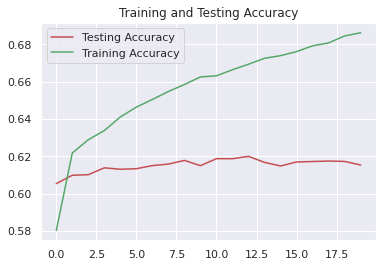

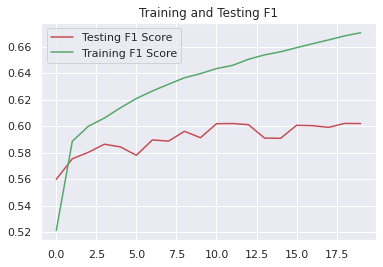

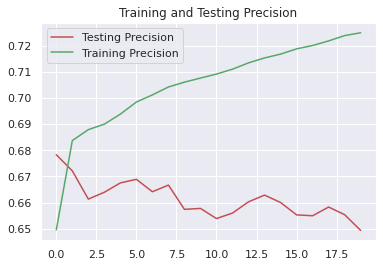

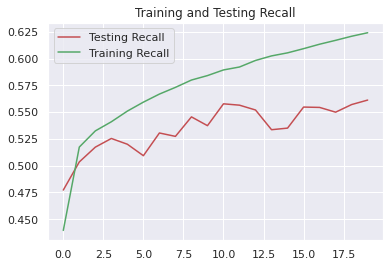

In [75]:
import matplotlib.pyplot as plt
evaluate = model.evaluate(X_test, Y_test, verbose=0)
print('Model performance')# print performance of my model
print('Accuracy:', evaluate[1])
print("f1score:", evaluate[2])
print('Precision: ', evaluate[3])
print("recall:", evaluate[4])
  
v= range(0,20)

training_loss = history.history['loss']

testing_accuracy = history.history['val_acc']
training_accuracy = history.history['acc']

testing_f1 = history.history['val_f1_m']
training_f1 = history.history['f1_m']

testing_precision = history.history['val_precision_m']
training_precision = history.history['precision_m']

testing_recall = history.history['val_recall_m']
training_recall = history.history['recall_m']

plt.figure()
plt.plot(v, testing_accuracy, 'r')
plt.plot(v, training_accuracy, 'g')
plt.title('Training and Testing Accuracy')
plt.legend(['Testing Accuracy', 'Training Accuracy'])

plt.figure()
plt.plot(v, testing_f1, 'r')
plt.plot(v, training_f1, 'g')
plt.title('Training and Testing F1')
plt.legend(['Testing F1 Score', 'Training F1 Score'])

plt.figure()
plt.plot(v, testing_precision, 'r')
plt.plot(v, training_precision, 'g')
plt.title('Training and Testing Precision')
plt.legend(['Testing Precision', 'Training Precision'])

plt.figure()
plt.plot(v, testing_recall, 'r')
plt.plot(v, training_recall, 'g')
plt.title('Training and Testing Recall')
plt.legend(['Testing Recall', 'Training Recall'])



